In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import gensim

In [2]:
df = pd.read_json("../data/processed_data/fixed_processed_after_NEMO.json")
dti = pd.to_datetime(df[["year", "month", "day", "hour"]], errors="coerce")
df["time"] = dti
df

,paragraph,hour,day,month,year,filename,time,lemmatized_text,nemo_status
0,"תם שימוע ראש הממשלה, בינימין נתניהו: לאחר עשר ...",21,7,10,2019,/Users/sapir/PycharmProjects/hebnlp_project/da...,2019-10-07 21:00:00,תם שימוע ראש ה ממשלה _ ב ינימין נתניהו _ לאחר ...,True
1,"גבר בן שלושים נורה ברחוב העלייה בלוד, מצבו קשה...",21,7,10,2019,/Users/sapir/PycharmProjects/hebnlp_project/da...,2019-10-07 21:00:00,גבר בן שלושים נורה ב רחוב ה עלייה ב לוד _ מצב ...,True
2,"הרמטכ""ל, רב אלוף אביב כוכבי, מזהיר הערב: ""לא נ...",21,7,10,2019,/Users/sapir/PycharmProjects/hebnlp_project/da...,2019-10-07 21:00:00,"ה רמטכ""ל _ רב אלוף אביב כוכבי _ מזהיר הערב _ _...",True
3,שר התחבורה בצלאל סמוטריץ' הודיע בעמוד הפייסבוק...,21,7,10,2019,/Users/sapir/PycharmProjects/hebnlp_project/da...,2019-10-07 21:00:00,שר ה תחבורה בצלאל סמוטריץ' הודיע ב עמוד ה פייס...,True
4,נשיא ארצות הברית טראמפ הודיע כי יציב קווים אדו...,21,7,10,2019,/Users/sapir/PycharmProjects/hebnlp_project/da...,2019-10-07 21:00:00,נשיא ארץ ה ברית טראמפ הודיע כי הציב קו אדומי ל...,True
...,...,...,...,...,...,...,...,...,...
5140,הלימודים לא מתחדשים לפחות עד מחרתיים - רק הערב...,8,9,2,2021,/Users/sapir/PycharmProjects/hebnlp_project/da...,2021-02-09 08:00:00,ה לימודים לא התחדש לפחות עד מחרתיים _ רק הערב ...,True
5141,בחירות אלפיים עשרים ואחת: יושב ראש ימינה חבר ה...,8,9,2,2021,/Users/sapir/PycharmProjects/hebnlp_project/da...,2021-02-09 08:00:00,בחירות אלפיים עשרים ו אחת _ יושב ראש ימינה חבר...,True
5142,המחדל בנבטים: במהלך הלילה אותרה הנקודה בגדר שמ...,8,9,2,2021,/Users/sapir/PycharmProjects/hebnlp_project/da...,2021-02-09 08:00:00,ה מחדל ב נבטי _ ב מהלך ה לילה אותר ה נקודה בגד...,True
5143,"הדיונים על פתיחת המסחר באמצעות ""הדרכון הירוק"" ...",8,9,2,2021,/Users/sapir/PycharmProjects/hebnlp_project/da...,2021-02-09 08:00:00,ה דיון על פתיחה ה מסחר באמצעות _ ה דרכון ה ירו...,True


In [3]:
df = df[df.nemo_status]

In [4]:
print(df.loc[0, "lemmatized_text"])

תם שימוע ראש ה ממשלה _ ב ינימין נתניהו _ לאחר עשר שעה של דיון ב תיק אלף _ תיק ה תינה ה יום נחתם ארבעה יום ה שימוע _ כעת על ה יועץ ה משפטי ל ה ממשלה אביחי מנדלבליט החליט האם הגיש כתב אישום ב ארבעה ה תיק _ כ תבן יובל אראל מציין כי עורך ה דין הגיש סיכום כתוב אחרי סוכה _ ו הזכיר כי ה משנה ל פרקליט ה מדינה _ ליאת בן ארי _ נעדר מן ה שימוע ב ה יום ה אחרון _ בשל חופשה משפחתי _


# Stopwords

## Hebrew Stopwords from file

In [5]:
def get_hebrew_stopwords(top_k):
    stop_path="../added_material/heb_stopwords.txt"
    with open(stop_path, encoding="utf-8") as in_file:
        lines=in_file.readlines()
        res=[l.strip() for l in lines]
        print(res[:top_k])
    return res

stop = set(get_hebrew_stopwords(250))
lemmatized_text = df["lemmatized_text"]

['את', 'לא', 'של', 'אני', 'על', 'זה', 'עם', 'כל', 'הוא', 'אם', 'או', 'גם', 'יותר', 'יש', 'לי', 'מה', 'אבל', 'פורום', 'אז', 'טוב', 'רק', 'כי', 'שלי', 'היה', 'בפורום', 'אין', 'עוד', 'היא', 'אחד', 'ב', 'ל', 'עד', 'לך', 'כמו', 'להיות', 'אתה', 'כמה', 'אנחנו', 'הם', 'כבר', 'אנשים', 'אפשר', 'תודה', 'שלא', 'אותו', 'ה', 'מאוד', 'הרבה', 'ולא', 'ממש', 'לו', 'א', 'מי', 'חיים', 'בית', 'שאני', 'יכול', 'שהוא', 'כך', 'הזה', 'איך', 'היום', 'קצת', 'עכשיו', 'שם', 'בכל', 'יהיה', 'תמיד', 'י', 'שלך', 'הכי', 'ש', 'בו', 'לעשות', 'צריך', 'כן', 'פעם', 'לכם', 'ואני', 'משהו', 'אל', 'שלו', 'שיש', 'ו', 'וגם', 'אתכם', 'אחרי', 'בנושא', 'כדי', 'פשוט', 'לפני', 'שזה', 'אותי', 'אנו', 'למה', 'דבר', 'כ', 'כאן', 'אולי', 'טובים', 'רוצה', 'שנה', 'בעלי', 'החיים', 'למען', 'אתם', 'מ', 'בין', 'יום', 'זאת', 'איזה', 'ביותר', 'לה', 'אחת', 'הכל', 'הפורומים', 'לכל', 'אלא', 'פה', 'יודע', 'שלום', 'דקות', 'לנו', 'השנה', 'דרך', 'אדם', 'נראה', 'זו', 'היחידה', 'רוצים', 'בכלל', 'טובה', 'שלנו', 'האם', 'הייתי', 'הלב', 'היו', 'ח', 'שדרות', 'בלי

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def get_top_stopwords_barchart(text, stop):
    #stop=set(stopwords.words('english'))
    #stop=set(get_hebrew_stopwords())
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True) 
    x,y=zip(*top)
    x=[w[::-1] for w in x]
    #plt.bar(x,y)
    return top

In [7]:
def invert_words(words):
    return [w[::-1] for w in words]

In [8]:
top = get_top_stopwords_barchart(lemmatized_text, stop)

In [9]:
for element in top[:40]:
    print(element)

('ה', 38301)
('ב', 19066)
('ל', 10393)
('ו', 7858)
('ש', 5904)
('את', 3788)
('מ', 3142)
('של', 2997)
('על', 2969)
('הוא', 2642)
('כי', 2507)
('כ', 2427)
('ראש', 1732)
('בית', 1441)
('לא', 1325)
('עם', 1205)
('בן', 1170)
('ישראל', 1122)
('אמר', 984)
('כך', 805)
('שני', 716)
('היה', 623)
('לאחר', 594)
('שעה', 578)
('שנה', 573)
('בין', 573)
('חבר', 512)
('היום', 502)
('יום', 499)
('נגד', 499)
('גם', 463)
('עד', 440)
('היא', 434)
('לפני', 430)
('שבוע', 416)
('ראשון', 410)
('מספר', 398)
('חדש', 391)
('אדם', 348)
('לבן', 344)


# most common stopwords

In [10]:
import seaborn as sns
from collections import  Counter

def plot_top_non_stopwords_barchart(text, stop):
    #stop=set(get_hebrew_stopwords())
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:50]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    f, ax = plt.subplots(figsize=[10,10])
    sns.barplot(x=y,y=invert_words(x), ax=ax)
    f.savefig("/Users/sapir/Documents/lemmas_top_words.png", dpi=300)
    return most

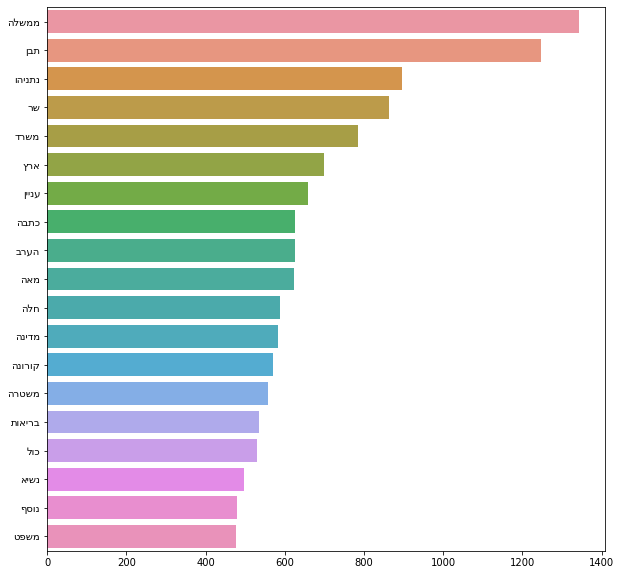

In [11]:
most_common = plot_top_non_stopwords_barchart(lemmatized_text, list(stop) + ["_"])

In [12]:
for element in most_common[:40]:
    print(element)

('ה', 38301)
('_', 34521)
('ב', 19066)
('ל', 10393)
('ו', 7858)
('ש', 5904)
('את', 3788)
('מ', 3142)
('של', 2997)
('על', 2969)
('הוא', 2642)
('כי', 2507)
('כ', 2427)
('ראש', 1732)
('בית', 1441)
('ממשלה', 1342)
('לא', 1325)
('תבן', 1248)
('עם', 1205)
('בן', 1170)
('ישראל', 1122)
('אמר', 984)
('נתניהו', 897)
('שר', 863)
('כך', 805)
('משרד', 784)
('שני', 716)
('ארץ', 698)
('עניין', 658)
('כתבה', 626)
('הערב', 625)
('מאה', 624)
('היה', 623)
('לאחר', 594)
('חלה', 589)
('מדינה', 582)
('שעה', 578)
('שנה', 573)
('בין', 573)
('קורונה', 571)


In [13]:
def remove_stopwords(s, stopwords):
    word_list = s.split()
    output = [w for w in word_list if not w in stopwords]
    return " ".join(output)

In [14]:
# CUSTOM_STOPWORDS = [word[0] for word in most_common if word[0] not in (list(stop) + ["_"])][:50]
CUSTOM_STOPWORDS = ["_", "תבן", "עניין", "כתבה", "כול", "נוסף"]

In [15]:
'ה' in stop

True

In [16]:
CUSTOM_STOPWORDS

['_', 'תבן', 'עניין', 'כתבה', 'כול', 'נוסף']

In [17]:
df.loc[:, "lemmatized_text"] = df.lemmatized_text.apply(lambda x: remove_stopwords(x, CUSTOM_STOPWORDS + list(stop)))

/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [18]:
lemmatized_text = df["lemmatized_text"]

In [19]:
lemmatized_text[0]

'תם שימוע ממשלה ינימין נתניהו עשר דיון תיק אלף תיק תינה נחתם ארבעה שימוע כעת יועץ משפטי ממשלה אביחי מנדלבליט החליט הגיש כתב אישום ארבעה תיק יובל אראל מציין עורך דין הגיש סיכום כתוב סוכה הזכיר משנה פרקליט מדינה ליאת ארי נעדר שימוע אחרון בשל חופשה משפחתי'

# Tokenization

In [ ]:
text_data = df.lemmatized_text.values.tolist()
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) 

data_words = list(sent_to_words(text_data))

In [77]:
len(df)

/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4742

In [20]:
text_data = df.lemmatized_text.values.tolist()
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) 

data_words = list(sent_to_words(text_data))

# Bigrams and Trigrams

In [21]:
bigram = gensim.models.Phrases(data_words, min_count=50, threshold=100)
bigram_mod = bigram.freeze()
trigram = gensim.models.Phrases(bigram[data_words], min_count=50, threshold=200)
trigram_mode = trigram.freeze()

In [22]:
from tqdm import tqdm
def make_bigrams(texts):
    return [bigram[doc] for doc in tqdm(texts)]

def make_trigrams(texts):
    return [trigram[bigram_mod[doc]] for doc in tqdm(texts)]

In [23]:
bigram_data_words = make_bigrams(data_words)

100%|██████████| 4742/4742 [00:00<00:00, 16638.55it/s]


In [24]:
trigram_data_words = make_trigrams(bigram_data_words)

100%|██████████| 4742/4742 [00:00<00:00, 12164.99it/s]


In [25]:
stop_grams = ["גלי_צהל", "בגלי_צהל"]

def remove_stopgrams(texts, stop_grams):
    return [[word for word in gensim.utils.simple_preprocess(str(doc)) if word not in stop_grams] for doc in tqdm(texts)]

In [26]:
processed_data = remove_stopgrams(trigram_data_words, stop_grams)

100%|██████████| 4742/4742 [00:00<00:00, 19407.14it/s]


In [74]:
len(data_words)

/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4742

In [27]:
bigram.export_phrases()

{'יועץ_משפטי': 226.21001005419456,
 'כתב_אישום': 121.77268360841849,
 'יובל_אראל': 225.87964876033058,
 'עורך_דין': 237.02406832298138,
 'מגן_דוד': 263.77419354838713,
 'דוד_אדום': 232.9181121314392,
 'ארץ_ברית': 130.21857438434577,
 'אורן_פדידה': 101.00094161958569,
 'דורון_קדוש': 437.3184803001877,
 'באר_שבע': 101.57481060606061,
 'צוות_מגן': 131.30747126436782,
 'אייר_מרציאנו': 191.08917136116327,
 'דונלד_טראמפ': 117.54849315068492,
 'ליה_ספילקין': 486.11142365994687,
 'מאיר_מרציאנו': 161.29774436090227,
 'משא_מתן': 320.87222222222226,
 'הדס_טייף': 257.4203612479474,
 'יובל_שגב': 254.8604338842975,
 'רצועה_עז': 127.50231481481482,
 'צחי_דבוש': 383.2043381180223,
 'קוב_מנדל': 397.6385542168675,
 'צבאי_צחי': 157.32500345925004,
 'חיל_אוויר': 110.01333333333334,
 'מוריה_אסרף': 321.574616922052,
 'יניר_קוזין': 227.11464004839686,
 'אסרף_ולברג': 248.54054948692487,
 'מדיני_מוריה': 109.71793888249586}

# Create dictionary and Corpus

In [28]:
import gensim.corpora as corpora

In [29]:
id2word = corpora.Dictionary(processed_data)

In [30]:
len(id2word)

10733

In [31]:
texts = processed_data
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 3), (33, 1), (34, 3), (35, 1)]


# Building LDA model

In [32]:
lda_model = gensim.models.LdaMulticore(corpus, 
                                   num_topics = 20, 
                                   id2word = id2word,                                    
                                   passes = 10,
                                   workers = 2, random_state=100)

In [33]:
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.012*"רב" + 0.007*"ירושלים" + 0.006*"תאונה" + 0.006*"אירוע" + '
  '0.005*"קורונה" + 0.005*"הביא" + 0.005*"מדינה" + 0.005*"הערב" + '
  '0.005*"ביטחון" + 0.005*"ישראלי"'),
 (1,
  '0.012*"קורונה" + 0.010*"בריאות" + 0.009*"משרד" + 0.008*"חיסון" + '
  '0.007*"מאה" + 0.007*"איש" + 0.006*"מנה" + 0.006*"שלושה" + 0.005*"ציבור" + '
  '0.005*"התפרצות"'),
 (2,
  '0.013*"קורונה" + 0.011*"הודיע" + 0.010*"מדינה" + 0.010*"משרד" + '
  '0.008*"בריאות" + 0.008*"חלה" + 0.006*"שר" + 0.005*"נגיף" + 0.005*"חוק" + '
  '0.005*"מחלה"'),
 (3,
  '0.010*"חשד" + 0.010*"מוות" + 0.010*"ערבי" + 0.008*"דיווח" + 0.008*"משטרה" + '
  '0.008*"רצח" + 0.007*"נהג" + 0.006*"איש" + 0.005*"שלושים" + 0.005*"אירוע"'),
 (4,
  '0.026*"ממשלה" + 0.019*"שר" + 0.015*"נתניהו" + 0.007*"לילה" + 0.006*"מחאה" + '
  '0.006*"אמש" + 0.006*"הגיע" + 0.005*"בנימין" + 0.005*"ביטחון" + '
  '0.005*"בחירה"'),
 (5,
  '0.013*"שר" + 0.010*"רכבת" + 0.008*"חינוך" + 0.008*"רמטכ" + 0.007*"רב" + '
  '0.007*"כוכבי" + 0.007*"גרעין" + 0.007*"קו" + 0.007

In [34]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.270310702959836

Coherence Score:  0.5123695923475946


In [35]:
import pyLDAvis
import pyLDAvis.gensim

In [36]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, sort_topics=False)
vis

/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.012977 -0.105463       1        1   3.336564
1      0.090555  0.049846       2        1   2.770687
2     -0.018963  0.104856       3        1   4.584335
3      0.079636 -0.141799       4        1   4.026160
4     -0.119610 -0.004865       5        1   5.365302
5     -0.074417 -0.037218       6        1   2.845245
6      0.093826  0.041529       7        1   3.704416
7     -0.118306 -0.062056       8        1   5.914380
8      0.012282 -0.029983       9        1   3.216521
9      0.059390 -0.182673      10        1  10.597581
10    -0.006211 -0.033483      11        1   3.552270
11     0.184608 -0.043453      12        1   6.049852
12    -0.142436  0.094796      13        1   6.712581
13    -0.196538 -0.015568      14        1   8.338260
14     0.005890 -0.082263      15        1   7.308916
15     0.063507  0.106267      16        1   4.702812
16     0.109294  0.147145      17        1   6.322243
17    -0.016012  0.087676      18        1   3.954938
18     0.055112  0.092801      19        1   3.748656
19    -0.074584  0.013906      20        1   2.948284, topic_info=        Term         Freq        Total Category  logprob  loglift
26    נתניהו   727.000000   727.000000  Default  30.0000  30.0000
855    חינוך   438.000000   438.000000  Default  29.0000  29.0000
19     ממשלה  1213.000000  1213.000000  Default  28.0000  28.0000
186      מאה   671.000000   671.000000  Default  27.0000  27.0000
1170    משרד   766.000000   766.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
374    עשרים    16.216387   492.672294  Topic20  -5.5949   0.1101
1692     פרט    15.162045   225.074575  Topic20  -5.6621   0.8263
107       שר    16.282478   904.687341  Topic20  -5.5908  -0.4936
850   בריאות    15.720752   602.953082  Topic20  -5.6259  -0.1229
227     אישר    14.745887   217.589625  Topic20  -5.6899   0.8323

[1550 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
1395       8  0.829651        al
10629      6  0.860543  anabtawi
10595      2  0.779481   bareket
10325      7  0.904781      beve
6910       4  0.204977     אבטלה
...      ...       ...       ...
2093      17  0.517283     תשעים
9022      11  0.825902       תשפ
3159       1  0.557487        תת
3159       4  0.119461        תת
3159      15  0.318564        תת

[5375 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [37]:
from tqdm import tqdm 

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
        model = gensim.models.LdaMulticore(corpus, 
                                   num_topics = num_topics, 
                                   id2word = id2word,                                    
                                   passes = 10,
                                   workers = 2, random_state=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=processed_data, start=2, limit=40, step=6)


/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 7/7 [02:14<00:00, 19.23s/it]


/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


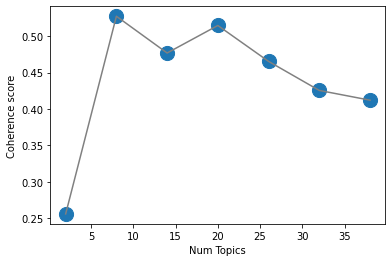

In [56]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values, "gray")
plt.scatter(x, coherence_values, s=200)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.savefig("/Users/sapir/Documents/lemmas_coherence.png", dpi=300)

In [40]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2559
Num Topics = 8  has Coherence Value of 0.5274
Num Topics = 14  has Coherence Value of 0.477
Num Topics = 20  has Coherence Value of 0.5147
Num Topics = 26  has Coherence Value of 0.4654
Num Topics = 32  has Coherence Value of 0.4255
Num Topics = 38  has Coherence Value of 0.4121


/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.008*"משטרה" + 0.007*"ירושלים" + 0.007*"חלה" + 0.007*"תאונה" + 0.007*"רב" '
  '+ 0.006*"רכב" + 0.005*"כביש" + 0.005*"איש" + 0.004*"נהרג" + 0.004*"טיפול"'),
 (1,
  '0.007*"מאה" + 0.007*"ישראלי" + 0.007*"לילה" + 0.006*"קורונה" + 0.006*"שוחח" '
  '+ 0.005*"אלף" + 0.004*"נשיא" + 0.004*"רב" + 0.004*"פרס" + 0.004*"מדינה"'),
 (2,
  '0.020*"משרד" + 0.020*"בריאות" + 0.019*"קורונה" + 0.014*"חינוך" + '
  '0.010*"מאה" + 0.009*"חלה" + 0.008*"שר" + 0.008*"אלף" + 0.007*"נגיף" + '
  '0.006*"חיסון"'),
 (3,
  '0.017*"משטרה" + 0.013*"חשד" + 0.012*"נפצע" + 0.011*"חשוד" + 0.011*"חקירה" + '
  '0.008*"מוות" + 0.008*"אירוע" + 0.008*"גבר" + 0.007*"חלה" + 0.006*"נעצר"'),
 (4,
  '0.027*"ממשלה" + 0.019*"נתניהו" + 0.017*"שר" + 0.008*"גנץ" + 0.006*"בנימין" '
  '+ 0.006*"מפלגה" + 0.005*"מאה" + 0.005*"יושב" + 0.005*"אלף" + 0.004*"בחירה"'),
 (5,
  '0.011*"צה" + 0.010*"שר" + 0.009*"דיווח" + 0.008*"ביטחון" + 0.007*"משפט" + '
  '0.006*"גנץ" + 0.006*"חייל" + 0.005*"סוריה" + 0.005*"רמטכ" + 0.005*"אמש"'),
 (6,
  '0

/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=text_data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=text_data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,7.0,0.6611,"ממשלה, מדינה, נתניהו, ארץ_ברית, מפלגה, נשיא, ש...",תם שימוע ממשלה ינימין נתניהו עשר דיון תיק אלף ...
1,1,0.0,0.5212,"משטרה, ירושלים, חלה, תאונה, רב, רכב, כביש, איש...",גבר שלושים נורה רחוב עלייה לוד חובש מגן דוד אד...
2,2,5.0,0.8133,"צה, שר, דיווח, ביטחון, משפט, גנץ, חייל, סוריה,...","רמטכ""ל רב אלוף כוכבי מזהיר הערב פגיעה התרחש הג..."
3,3,0.0,0.3446,"משטרה, ירושלים, חלה, תאונה, רב, רכב, כביש, איש...",שר תחבורה בצלאל סמוטריץ' הודיע עמוד פייסבוק בע...
4,4,7.0,0.3810,"ממשלה, מדינה, נתניהו, ארץ_ברית, מפלגה, נשיא, ש...",נשיא ארץ ברית טראמפ הודיע הציב קו אדומי תורכי ...
5,5,0.0,0.7254,"משטרה, ירושלים, חלה, תאונה, רב, רכב, כביש, איש...",שוער פועל חדר חביב אוחיון נותח נפגע הערב מהלך ...
6,6,7.0,0.7933,"ממשלה, מדינה, נתניהו, ארץ_ברית, מפלגה, נשיא, ש...",יועץ משפטי ממשלה מנדלבליט עדכן ממשלה נתניהו פי...
7,7,4.0,0.7119,"ממשלה, נתניהו, שר, גנץ, בנימין, מפלגה, מאה, יו...",יושב כחול כינס גנץ צפה נאום עצרת מרכזי זכר ממש...
8,8,7.0,0.8264,"ממשלה, מדינה, נתניהו, ארץ_ברית, מפלגה, נשיא, ש...",משבר ברקזיט ממשלה בריטניה הגיש בקשה בחירות כלל...
9,9,2.0,0.4403,"משרד, בריאות, קורונה, חינוך, מאה, חלה, שר, אלף...",עירייה רמה גן הודיע החזיר פעילות קו אוטובוס תל...


In [43]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet

/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9844,"משטרה, ירושלים, חלה, תאונה, רב, רכב, כביש, איש...",התרסקות מטוס סנונית נובמבר אחרון מתחקיר תאונה ...
1,1.0,0.9854,"מאה, ישראלי, לילה, קורונה, שוחח, אלף, נשיא, רב...",שלוש סגירה רשימה כנסת עשרים ארבע מפלגה ליכוד ה...
2,2.0,0.9891,"משרד, בריאות, קורונה, חינוך, מאה, חלה, שר, אלף...",שר ממשלה אישר הערב משאל טלפוני תו פתיחה מערכה ...
3,3.0,0.9869,"משטרה, חשד, נפצע, חשוד, חקירה, מוות, אירוע, גב...",פרקליטות החליט סגר תיק חקירה לשכה עורך דין לשע...
4,4.0,0.9861,"ממשלה, נתניהו, שר, גנץ, בנימין, מפלגה, מאה, יו...",אלכסיי נבלני מנהיג אופוזיציה רוסי נאסר שלוש גז...
5,5.0,0.9873,"צה, שר, דיווח, ביטחון, משפט, גנץ, חייל, סוריה,...","רמטכ""ל רב אלוף כוכבי הנחה צה""ל הכין תוכנית תקי..."
6,6.0,0.9838,"פועל, תל, ליגה, כיבה, ספורט, כדורגל, אפס, כתב,...",רשת חברתי פרלר parler פעילות חודש הושבת פרלר א...
7,7.0,0.9886,"ממשלה, מדינה, נתניהו, ארץ_ברית, מפלגה, נשיא, ש...",יצא משלחת ישראלי אמריקני מרוקו מסגרת סדרה יחסי...


In [51]:
print(sent_topics_sorteddf_mallet.loc[3, "Keywords"])
print(sent_topics_sorteddf_mallet.loc[3, "Text"])

משטרה, חשד, נפצע, חשוד, חקירה, מוות, אירוע, גבר, חלה, נעצר
פרקליטות החליט סגר תיק חקירה לשכה עורך דין לשעבר נווה שופט אתי רייף משנה פרקליט מדינה ערך דין שלמה למברגר קבע סיכוי סביר הרשעה ממצא גנז תיק מברגר הדגיש הצדקה חובה פתח חקירה נווה התעלם חשד חמור עלה ביצוע עבירות שוחד טוהר מידה נגע מינוי שופט אולם מכלול נסיבה קובע משנה פרקליט מדינה הוגן עשה שימוש ראיה מקור פגיעה פרטיות זכות נווה ידיעה העביר משפט איתי שריג


/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word, sort_topics=False)
vis

/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.115530  0.062906       1        1  10.072019
1     -0.018763 -0.042076       2        1   7.692660
2     -0.097048 -0.090865       3        1  18.227302
3      0.198573  0.058308       4        1  15.517757
4     -0.105710  0.021043       5        1  14.792015
5     -0.049265  0.143174       6        1   9.810945
6      0.084736 -0.181883       7        1   7.008537
7     -0.128052  0.029392       8        1  16.878764, topic_info=        Term         Freq        Total Category  logprob  loglift
850   בריאות   625.000000   625.000000  Default  30.0000  30.0000
26    נתניהו   708.000000   708.000000  Default  29.0000  29.0000
19     ממשלה  1223.000000  1223.000000  Default  28.0000  28.0000
306    משטרה   588.000000   588.000000  Default  27.0000  27.0000
8130  קורונה   706.000000   706.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
287   ביטחון   110.440706   399.090971   Topic8  -5.4212   0.4944
1170    משרד   119.010362   783.929548   Topic8  -5.3465  -0.1060
298     כנסת    93.146003   272.736837   Topic8  -5.5916   0.7048
261     חודש    94.772406   325.893147   Topic8  -5.5742   0.5440
119    דיווח    88.135826   472.288413   Topic8  -5.6468   0.1004

[620 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
10629      6  0.878209  anabtawi
9524       1  0.956584       cbs
7158       2  0.844602     אבואב
438        2  0.069099   אביגדור
438        5  0.898291   אביגדור
...      ...       ...       ...
2038       5  0.581265     תרבות
2038       6  0.069198     תרבות
2038       7  0.166076     תרבות
3574       6  0.276729     תרגיל
3574       7  0.691823     תרגיל

[1724 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8])

In [54]:
pyLDAvis.save_html(vis, 'optimal_model_lda.html')

/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
# optimal_model.save("/Users/sapir/PycharmProjects/hebnlp_project/models/optimal_model")

/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
df_dominant_topic = df_dominant_topic.rename(columns={"Text": "lemmatized_text"})

/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [126]:
indices_original = df.index.tolist()
new_indices = range(4742)
df = df.rename(index=dict(zip(indices_original,new_indices)))


/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [127]:
topics_df  = df.merge(df_dominant_topic, right_index=True, left_index=True)

/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [128]:
topics_df

/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,paragraph,hour,day,month,year,filename,time,lemmatized_text_x,nemo_status,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,lemmatized_text_y
0,"תם שימוע ראש הממשלה, בינימין נתניהו: לאחר עשר ...",21,7,10,2019,/Users/sapir/PycharmProjects/hebnlp_project/da...,2019-10-07 21:00:00,תם שימוע ממשלה ינימין נתניהו עשר דיון תיק אלף ...,True,0,7.0,0.6611,"ממשלה, מדינה, נתניהו, ארץ_ברית, מפלגה, נשיא, ש...",תם שימוע ממשלה ינימין נתניהו עשר דיון תיק אלף ...
1,"גבר בן שלושים נורה ברחוב העלייה בלוד, מצבו קשה...",21,7,10,2019,/Users/sapir/PycharmProjects/hebnlp_project/da...,2019-10-07 21:00:00,גבר שלושים נורה רחוב עלייה לוד חובש מגן דוד אד...,True,1,0.0,0.5212,"משטרה, ירושלים, חלה, תאונה, רב, רכב, כביש, איש...",גבר שלושים נורה רחוב עלייה לוד חובש מגן דוד אד...
2,"הרמטכ""ל, רב אלוף אביב כוכבי, מזהיר הערב: ""לא נ...",21,7,10,2019,/Users/sapir/PycharmProjects/hebnlp_project/da...,2019-10-07 21:00:00,"רמטכ""ל רב אלוף כוכבי מזהיר הערב פגיעה התרחש הג...",True,2,5.0,0.8133,"צה, שר, דיווח, ביטחון, משפט, גנץ, חייל, סוריה,...","רמטכ""ל רב אלוף כוכבי מזהיר הערב פגיעה התרחש הג..."
3,שר התחבורה בצלאל סמוטריץ' הודיע בעמוד הפייסבוק...,21,7,10,2019,/Users/sapir/PycharmProjects/hebnlp_project/da...,2019-10-07 21:00:00,שר תחבורה בצלאל סמוטריץ' הודיע עמוד פייסבוק בע...,True,3,0.0,0.3446,"משטרה, ירושלים, חלה, תאונה, רב, רכב, כביש, איש...",שר תחבורה בצלאל סמוטריץ' הודיע עמוד פייסבוק בע...
4,נשיא ארצות הברית טראמפ הודיע כי יציב קווים אדו...,21,7,10,2019,/Users/sapir/PycharmProjects/hebnlp_project/da...,2019-10-07 21:00:00,נשיא ארץ ברית טראמפ הודיע הציב קו אדומי תורכי ...,True,4,7.0,0.3810,"ממשלה, מדינה, נתניהו, ארץ_ברית, מפלגה, נשיא, ש...",נשיא ארץ ברית טראמפ הודיע הציב קו אדומי תורכי ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4737,הלימודים לא מתחדשים לפחות עד מחרתיים - רק הערב...,8,9,2,2021,/Users/sapir/PycharmProjects/hebnlp_project/da...,2021-02-09 08:00:00,לימודים התחדש מחרתיים הערב התכנס ועדה שר קורונ...,True,4737,2.0,0.9757,"משרד, בריאות, קורונה, חינוך, מאה, חלה, שר, אלף...",לימודים התחדש מחרתיים הערב התכנס ועדה שר קורונ...
4738,בחירות אלפיים עשרים ואחת: יושב ראש ימינה חבר ה...,8,9,2,2021,/Users/sapir/PycharmProjects/hebnlp_project/da...,2021-02-09 08:00:00,בחירות אלפיים עשרים יושב ימינה כינס נפתל בנט ס...,True,4738,4.0,0.9513,"ממשלה, נתניהו, שר, גנץ, בנימין, מפלגה, מאה, יו...",בחירות אלפיים עשרים יושב ימינה כינס נפתל בנט ס...
4739,המחדל בנבטים: במהלך הלילה אותרה הנקודה בגדר שמ...,8,9,2,2021,/Users/sapir/PycharmProjects/hebnlp_project/da...,2021-02-09 08:00:00,מחדל נבטי מהלך לילה אותר נקודה בגדר ככל נמלט ח...,True,4739,1.0,0.5740,"מאה, ישראלי, לילה, קורונה, שוחח, אלף, נשיא, רב...",מחדל נבטי מהלך לילה אותר נקודה בגדר ככל נמלט ח...
4740,"הדיונים על פתיחת המסחר באמצעות ""הדרכון הירוק"" ...",8,9,2,2021,/Users/sapir/PycharmProjects/hebnlp_project/da...,2021-02-09 08:00:00,דיון פתיחה מסחר באמצעות דרכון ירוק נמשך הערב צ...,True,4740,2.0,0.9763,"משרד, בריאות, קורונה, חינוך, מאה, חלה, שר, אלף...",דיון פתיחה מסחר באמצעות דרכון ירוק נמשך הערב צ...


In [133]:
np.all(topics_df.lemmatized_text_x == topics_df.lemmatized_text_y)

/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


True

In [136]:
topics_df.drop("lemmatized_text_y", inplace=True, axis=1)

/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [139]:
topics_df.rename(columns={"lemmatized_text_x": "lemmatized_text"}, inplace=True)

/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [141]:
topics_df.to_json("result_topics_df.json")

/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
